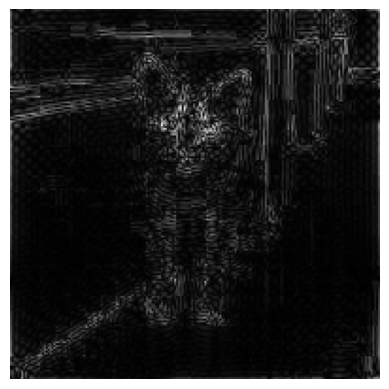

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

def plot_spectrum(image_path, alpha, save_path=None):
    # 이미지 불러오기
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 이미지의 2D 푸리에 변환 수행
    f_transform = np.fft.fft2(img)

    # 주파수 영역으로 변환
    f_transform_shifted = np.fft.fftshift(f_transform)

    # 주파수 스펙트럼의 크기 계산
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))

    # 피크를 강조하기 위해 중심 부분 추출
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    f_transform_shifted[crow-30:crow+30, ccol-30:ccol+30] = alpha * f_transform_shifted[crow-30:crow+30, ccol-30:ccol+30]

    # 필터를 적용
    f_transform_shifted = f_transform_shifted

    # 다시 주파수 영역에서 이미지 영역으로 변환
    f_transform_inverse = np.fft.ifftshift(f_transform_shifted)
    img_back = np.fft.ifft2(f_transform_inverse)
    img_back = np.abs(img_back)

    # 결과를 시각화
    plt.imshow(img_back, cmap='gray')
    plt.axis('off')  # 축 눈금 및 레이블 비활성화

    # 이미지 저장 여부 확인
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    else:
        plt.show()

def process_images_in_folder(input_folder, output_folder, alpha):
    # 생성된 저장 폴더가 없다면 생성
    os.makedirs(output_folder, exist_ok=True)

    # 폴더 내 모든 이미지 파일에 대해 처리
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg','.jpeg','.webp')):
            image_path = os.path.join(input_folder, filename)

            # 추출된 파일 이름을 이용하여 저장 경로 생성
            image_name = os.path.splitext(filename)[0]
            save_path = os.path.join(output_folder, f'{image_name}_transform.png')

            # 이미지 처리 및 저장
            plot_spectrum(image_path, alpha, save_path)

# 입력 폴더와 출력 폴더를 설정하세요.
input_folder = '/content/drive/MyDrive/Colab Notebooks/패턴인식이미지데이터/real_1'
output_folder = '/content/drive/MyDrive/Colab Notebooks/패턴인식이미지데이터/tttt'

# 강조 정도를 조절하기 위한 alpha 값
alpha = 0

# 이미지를 처리하고 저장
process_images_in_folder(input_folder, output_folder, alpha)
